In [206]:
# Run this cell, but please don't change it.
## Import the math library.  This is one of many libraries.

import math
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import itertoolsreg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 5, L1_wt = 0)

np.set_printoptions(threshold=50, linewidth=100)
import matplotlib as mpl
mpl.rc('font', size=16)

# these two are new to this class
from numpy.linalg import eigh
import pandas as pd
import statsmodels.api as sm
from statsmodels.compat.python import range
from statsmodels.discrete.discrete_model import Logit


# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# STAT 89A  Final Project 
The goal of this project is to test your understanding of how correlations of multiple variables behave in higher dimensions, and how to perform Principal Component Analysis (PCA) on datasets.

### Please fill in your name in the next cell.

In [35]:
Your_Name = ["Aummul Baneen Manasawala"]

# Part 1
In the first part of this project, we will go through the process of how to clean up a raw dataset that can be used for PCA, look for some possible relationships between variables, and compute least-sqaure models. 

### Question 1
We are going to import the 2015-16 NBA Stats from Basketball Reference (http://www.basketball-reference.com/leagues/NBA_2016_totals.html). Run the next cell to import the data.

In [36]:
# We imported basketball data from http://www.basketball-reference.com/leagues/NBA_2016_totals.html 
basketball_data = Table.read_table('basketball.csv')
basketball_data

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Quincy Acy,PF,25,SAC,57,29,831,114,200,.570,18,43,.419,96,157,.611,.615,42,56,.750,64,115,179,24,26,21,23,101,288
2,Jordan Adams,SG,21,MEM,2,0,15,2,6,.333,0,1,.000,2,5,.400,.333,3,5,.600,0,2,2,3,3,0,2,2,7
3,Steven Adams,C,22,OKC,78,78,1952,248,409,.606,0,0,nan,248,409,.606,.606,110,188,.585,206,303,509,60,40,86,82,216,606
4,Arron Afflalo,SG,30,NYK,70,57,2345,349,788,.443,88,233,.378,261,555,.470,.499,110,131,.840,23,242,265,142,24,10,81,141,896
5,Alexis Ajinca,C,27,NOP,59,17,861,150,315,.476,0,1,.000,150,314,.478,.476,52,62,.839,75,194,269,31,19,36,54,134,352
6,Cole Aldrich,C,27,LAC,58,4,760,127,218,.583,0,0,nan,127,218,.583,.583,54,78,.692,84,190,274,48,45,62,63,135,308
7,LaMarcus Aldridge,PF,30,SAS,73,73,2242,534,1040,.513,0,16,.000,534,1024,.521,.513,255,296,.861,175,452,627,110,38,80,98,150,1323
8,Cliff Alexander,PF,20,POR,8,0,36,5,10,.500,0,0,nan,5,10,.500,.500,0,0,nan,2,4,6,0,1,2,1,1,10
9,Lavoy Allen,PF,26,IND,77,26,1555,182,353,.516,0,0,nan,182,353,.516,.516,46,73,.630,156,257,413,75,26,41,69,142,410
10,Tony Allen,SF,34,MEM,64,57,1620,215,469,.458,15,42,.357,200,427,.468,.474,90,138,.652,104,192,296,70,110,18,78,175,535


#### Question 1.1
We realized that all the categories are labeled using abbreviations. To get a better understanding of what each statistic represents, we want to make a glossary of each term in the table. Please google terms that you don't understand. This project will later ask you to predict and test correlations between certain sets of features, it is for you own benefit to know the meanings of all the terms thoroughly. 
*The statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

An array of the complete names of labels is provided for you called `full_names`. Make a table called `glossary` that has two columns: `'Abbreviation'` and `'Full_Name'` that matches every column label in the table `basketball_data` with its full name.

In [37]:
full_names = ['Rank', 'Player', 'Position', 'Age of Player at the start of February 1st of that season', 'Team', 'Games', 'Games Started', 'Minutes Played', 'Field Goals', 'Field Goal Attempts', 'Field Goal Percentage', '3-Point Field Goals', '3-Point Field Goal Attempts', 'FG% on 3-Pt FGAs', '2-Point Field Goals', '2-point Field Goal Attempts', 'FG% on 2-Pt FGAs', 'Effective Field Goal Percentage', 'Free Throws', 'Free Throw Attempts', 'Free Throw Percentage', 'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points']
# Your Code Here:
original_columns_labels = list(basketball_data)
# type=[('original_names', '<U57'),('full_names' , '<U57')]
# matrix = [[0 for i in range(2)] for i in range(len(original_columns_labels))]
# for i in range(len(original_columns_labels)):
#         matrix[i][0] = original_columns_labels[i]
#         matrix[i][1] = full_names[i]
# arr = np.array(matrix, dtype='<U57')
# print (arr)
glossary = Table().with_columns("Original Names",original_columns_labels, "Full Names", full_names)
glossary.show() 

Original Names,Full Names
Rk,Rank
Player,Player
Pos,Position
Age,Age of Player at the start of February 1st of that season
Tm,Team
G,Games
GS,Games Started
MP,Minutes Played
FG,Field Goals
FGA,Field Goal Attempts


#### Question 1.2 

#### Clean the `basketball_data`. Here are several hints:

1. Remove all nonsense rows (We see that there are a few rows with ['RK', 'Player', 'Pos', 'Age' .....])

2. Some of the values are none, please fix them by yourself (e.g. `'FT'` and `'FTA'` are $0$, then `'FT%'` is `'nan'`.)

3. Some players played in different teams during the season, resulting in multiple rows in our table. Please fix it.

4. Convert all values in the dataset to float or integer. How about `'Player','Pos','Tm','count'`?


In [38]:
# Your code here:
#data cleaning performed in R, separate code file attached 
final_table = Table.read_table('final_basketball.csv')
final_table

Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG.,X3P,X3PA,X3P.,X2P,X2PA,X2P.,eFG.,FT,FTA,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,1,Quincy Acy,PF,25,SAC,57,29,831,114,200,0.57,18,43,0.419,96,157,0.611,0.615,42,56,0.75,64,115,179,24,26,21,23,101,288
2,2,Jordan Adams,SG,21,MEM,2,0,15,2,6,0.333,0,1,0,2,5,0.4,0.333,3,5,0.6,0,2,2,3,3,0,2,2,7
3,3,Steven Adams,C,22,OKC,78,78,1952,248,409,0.606,0,0,0,248,409,0.606,0.606,110,188,0.585,206,303,509,60,40,86,82,216,606
4,4,Arron Afflalo,SG,30,NYK,70,57,2345,349,788,0.443,88,233,0.378,261,555,0.47,0.499,110,131,0.84,23,242,265,142,24,10,81,141,896
5,5,Alexis Ajinca,C,27,NOP,59,17,861,150,315,0.476,0,1,0,150,314,0.478,0.476,52,62,0.839,75,194,269,31,19,36,54,134,352
6,6,Cole Aldrich,C,27,LAC,58,4,760,127,218,0.583,0,0,0,127,218,0.583,0.583,54,78,0.692,84,190,274,48,45,62,63,135,308
7,7,LaMarcus Aldridge,PF,30,SAS,73,73,2242,534,1040,0.513,0,16,0,534,1024,0.521,0.513,255,296,0.861,175,452,627,110,38,80,98,150,1323
8,8,Cliff Alexander,PF,20,POR,8,0,36,5,10,0.5,0,0,0,5,10,0.5,0.5,0,0,0,2,4,6,0,1,2,1,1,10
9,9,Lavoy Allen,PF,26,IND,77,26,1555,182,353,0.516,0,0,0,182,353,0.516,0.516,46,73,0.63,156,257,413,75,26,41,69,142,410
10,10,Tony Allen,SF,34,MEM,64,57,1620,215,469,0.458,15,42,0.357,200,427,0.468,0.474,90,138,0.652,104,192,296,70,110,18,78,175,535


### Question 2
We will now try to see if there is any correlation between pairs of variables. Please review the glossary of basketball terms.

#### Question 2.1
Complete a function called `corr` that takes in a table, two columns(`column_A, column_B`), and returns the correlation of the two variables and a scatterplot. 

In [39]:
# function that allows us to compute the correlation
def standard_units(x):
    """Convert any array of numbers to standard units"""
    return (x - np.average(x))/np.std(x)



def corr(table, column_A, column_B):
    x = table[column_A]
    y = table[column_B]
    table.scatter(column_A, column_B, s=10, fit_line=True)
    
# Your code here, fill in the return statement:    
    return  np.average((standard_units(x))*standard_units(y))

#### Question 2.2
Compute the correlation between `Age` and `Points`. Use a couple sentences to describe what you see graphically and explain why you think the correlation is the way it is in terms of basketball knowledge? 

-0.0055682879353161187

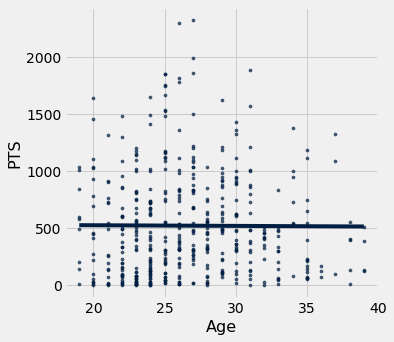

In [40]:
corr(final_table, 'Age', 'PTS')

#### Your answer here:

With the increase in age from 19 to 25, the experience increase which justifies the increase in the points scored highest in the age group 25 to 30. After 30, the energy levels and physical fitness starts decreasing resulting in the decline of the highest number of points from age 27 onwards. Overall, the correlation becomes close to zero and very slightly negative to be precise.

#### Question 2.3
Compute the correlation between `Defensive Rebounds` and `Total Rebounds`. Use a couple sentences to describe what you see graphically and explain why you think the correlation is the way it is in terms of basketball knowledge? 

0.98592183045066151

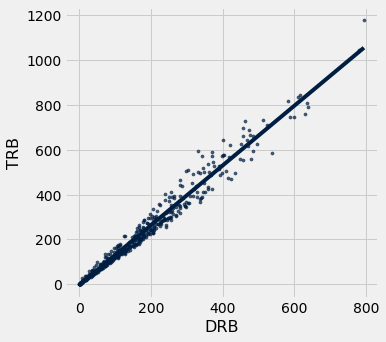

In [41]:
corr(final_table, "DRB", "TRB")

#### Your answer here:

There is a highly positive correlation between the defensive rebound and the total rebound which is intuitive because if the defensive rebound which I assume is the popular type of rebound would increase, the total rebound would increase with it.

### Question 3
After seeing a couple scatter plots and their r_values, we would like to predict a y-value using a specific x-value.

First, to avoid computing the graph everytime when we run `corr`, write a function called `correlation` that does everything that `corr` does without outputing the scatterplot. 

Then, Write a function that computes the slope called `slope`, and one that computes the intercept called `intercept` of the least squared line. They both take in a table, a x-value, and a y-value. (Hint: use the function `correlation` when you need the r-value to compute component(s) for slope or intercept).

In [42]:
### Your code here:
def correlation(table, column_A, column_B):
    x = table[column_A]
    y = table[column_B]
    return np.average((standard_units(x))*standard_units(y))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r*np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    return np.average(table.column(y)) - slope(table, x, y)*np.average(table.column(x))

#### Question 3.1
Compute the correlation between `Games` and `Minutes Played` using `corr`. Use a couple sentences to describe what you see graphically and explain why you think the correlation is the way it is in terms of basketball knowledge? 

Then compute the slope and the intercept of the line using the functions you defined above. 

0.86316969573995761

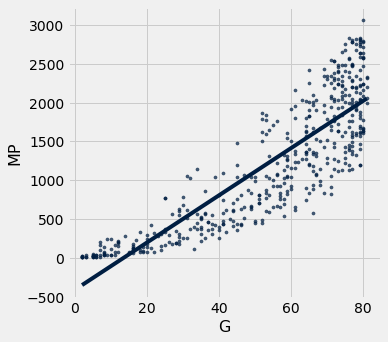

In [43]:
corr(final_table, "G", "MP" )

#### Your answer here:

The number of games and the minutes played is highly correlated positively because the more number of games one plays, the more is the minutes that he would be playing.

In [44]:
slope(final_table, "G", "MP")

30.393336590331312

In [45]:
intercept(final_table, "G", "MP")

-409.81534122581343

#### Question 3.2
Write a function called `pred_MP` that takes in a value of Games and returns the predicted value of Minutes Played using the slope and intercept you found in 3.1. 

Then call the `pred_MP` and compute the residual when Games = 22.

In [46]:
# Your code here:
def pred_MP(games):
    return (intercept(final_table, "G", "MP") + (games*slope(final_table, "G", "MP")))
mp_for_22_games = final_table.where("G", 22)
residual = (np.average(mp_for_22_games.column("MP")) - pred_MP(22)) 
residual

-64.838063761475496

#### Question 3.3
Compute the sum of residual squares of the least_squared line you computed in 3.1. Is our linear model a good fit? Why or why not? Describe an ideal model that you would use for this particular pair of variables.

Coming up with a better prediction model that has the sum of residual squared less than 30000.

#### Your answer here:

In [47]:
#computing the sum of residual squares
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y) :
    return t.column(y)-fitted_values(t, x, y)

residuals(final_table, "G", "MP")

def rss(residuals):
    return np.linalg.norm(residuals)**2

rss1 = rss(residuals(final_table, "G", "MP"))
rss1

83820059.121075898

In [48]:
# Compute a better model here:

# lets try with degree 2

coeffs_quad_fit = np.polyfit(final_table.column("G"), final_table.column("MP"), deg= 2)

def fitted_values_2(t, x, y):
    return ((coeffs_quad_fit[2]) + (coeffs_quad_fit[1]*t.column(x)) + (coeffs_quad_fit[0]*((t.column(x))**2)))

def residuals_2(t, x, y) :
    return t.column(y)-fitted_values_2(t, x, y)

rss2 = rss(residuals_2(final_table, "G", "MP"))
print(rss2)

#degree 3

coeffs_cubic_fit = np.polyfit(final_table.column("G"), final_table.column("MP"), deg= 3)

def fitted_values_3(t, x, y):
    return ((coeffs_cubic_fit[3]) + (coeffs_cubic_fit[2]*(t.column(x))) + (coeffs_cubic_fit[1]*((t.column(x))**2)) +
           (coeffs_cubic_fit[0]*(t.column(x))**3))

def residuals_3(t, x, y) :
    return t.column(y)-fitted_values_3(t, x, y)

rss3 = rss(residuals_3(final_table, "G", "MP"))
print(rss3)

71616529.6903
71588828.9857


Since the rss is very slowly decreasing, lets try a higher power, say 7

In [49]:
coeffs_ten_fit = np.polyfit(final_table.column("G"), final_table.column("MP"), deg= 7)

def fitted_values_7(t, x, y):
    return ((coeffs_ten_fit[7]) + (coeffs_ten_fit[6]*(t.column(x))) + 
            (coeffs_ten_fit[5]*((t.column(x))**2)) +
           (coeffs_ten_fit[4]*(t.column(x))**3) + (coeffs_ten_fit[3]*(t.column(x))**4) +
           (coeffs_ten_fit[2]*(t.column(x))**5) + (coeffs_ten_fit[1]*(t.column(x))**6) +
           (coeffs_ten_fit[0]*(t.column(x))**7))

def residuals_7(t, x, y) :
    return t.column(y)-fitted_values_7(t, x, y)

rss7 = rss(residuals_7(final_table, "G", "MP"))
print(rss7)

rmse = (rss7/final_table.num_rows)**0.5

print(rmse)

71132205.4828
387.795322867


# Now LS - Multivariate Least Squares

We saw in part 1 that certain statistics could not be broadcast as a linear regression of another. To mitigate this we could try a multiple linear regression using least squares.
We will predict one dependent variable as a function of a few independent variables. This part will use the pandas dataframe object in order to simplify the calculations.

**Question 9.0.** Convert `basketball_numbers` into a data-frame, using one of the `Table` methods. You can find this method by going to the `Tables` documentation under the 'Exporting/Displaying' category.

In [6]:
basketball_df = Table.to_df(basketball_numbers)

When we perform a multiple regression it's not enough just to have a slope and intercept, we would like to know other characteristics about the data. We have one dependent variable and it is shown in the top left of the table that is displayed. The model and method are as expected, and the number of observations is equal to the number of rows. The next cell gives the framework for what needs to be done to run a multiple regression. The only things that change are the name of the dataframe table (which in this case is `basketball_df`) and the names of the independent variables and dependent variable.

**Question 9.1.** Run the next cell.

In [7]:
x = basketball_df[['MP']]
y = basketball_df['PTS']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1673.
Date:                Fri, 11 May 2018   Prob (F-statistic):          4.06e-140
Time:                        07:41:18   Log-Likelihood:                -2522.8
No. Observations:                 376   AIC:                             5050.
Df Residuals:                     374   BIC:                             5058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -110.8340     19.929     -5.561      0.000    -150.022     -71.647
MP             0.5136      0.013     40.902      0.000       0.489       0.538
==============================================================================
Omnibus:                       90.919   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.422
Skew:                           1.054   Prob(JB):                     6.45e-68
Kurtosis:                       6.913   Cond. No.                     3.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 9.2.** Perform a multiple regression with two independent variables on `"AST"`.

In [11]:
x = basketball_df[['MP', 'PTS']]
y = basketball_df['AST']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AST   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     206.4
Date:                Fri, 11 May 2018   Prob (F-statistic):           4.46e-61
Time:                        07:54:35   Log-Likelihood:                -2241.3
No. Observations:                 376   AIC:                             4489.
Df Residuals:                     373   BIC:                             4500.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8572      9.821     -1.207      0.228     -31.168       7.453
MP             0.0383      0.014      2.755      0.006       0.011       0.066
PTS            0.1497      0.024      6.113      0.000       0.102       0.198
==============================================================================
Omnibus:                      208.128   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1793.392
Skew:                           2.198   Prob(JB):                         0.00
Kurtosis:                      12.754   Cond. No.                     3.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 9.3.** Perform a multiple regression with three independent variables on `"TOV"`.

In [12]:
x = basketball_df[['MP', 'PTS', 'AST']]
y = basketball_df['TOV']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TOV   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1180.
Date:                Fri, 11 May 2018   Prob (F-statistic):          1.23e-189
Time:                        07:58:39   Log-Likelihood:                -1650.3
No. Observations:                 376   AIC:                             3309.
Df Residuals:                     372   BIC:                             3324.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9396      2.046      1.437      0.152      -1.084       6.963
MP             0.0078      0.003      2.684      0.008       0.002       0.014
PTS            0.0606      0.005     11.340      0.000       0.050       0.071
AST            0.2256      0.011     20.953      0.000       0.204       0.247
==============================================================================
Omnibus:                       31.050   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.122
Skew:                           0.258   Prob(JB):                     1.49e-23
Kurtosis:                       5.539   Cond. No.                     3.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 9.4.** Perform a multiple with regression with five independent variables on a dependent variable of your choice.

In [294]:
basketball_df= basketball_df.astype(float)
x = basketball_df[['MP', 'TOV', 'AST', 'Age', 'FG%']]
y = basketball_df['PTS']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     526.3
Date:                Fri, 11 May 2018   Prob (F-statistic):          1.00e-165
Time:                        15:45:18   Log-Likelihood:                -2448.8
No. Observations:                 376   AIC:                             4910.
Df Residuals:                     370   BIC:                             4933.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -128.0775     71.771     -1.785      0.075    -269.207      13.052
MP             0.2938      0.020     14.878      0.000       0.255       0.333
TOV            4.2553      0.386     11.011      0.000       3.495       5.015
AST           -0.5040      0.136     -3.701      0.000      -0.772      -0.236
Age            0.7901      1.976      0.400      0.689      -3.095       4.675
FG%           62.4162    128.764      0.485      0.628    -190.786     315.618
==============================================================================
Omnibus:                       38.496   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.890
Skew:                           0.479   Prob(JB):                     7.50e-23
Kurtosis:                       5.364   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 9.5.** Implement Ridge Regression with different values of regularization parameter. Compare it with the previous result, i.e. **Question 9.4**

In [296]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [-128.07753177    0.29378805    4.25530325   -0.50403887    0.7901371    62.4161687 ]
MSE :  26578.825315084832
R^2 :  0.876737760773


We get exactly the same coefficients for all the variables in ridge regression when the regularization parameter _alpha_ is 0 (L1_wt = 0 for ridge and 1 for Lasso) as in the normal multiple regression. Now lets change the alpha to 0.05, 0.5, 5 and 10 respectively.


In [297]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0.001, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [-116.13704467    0.2941444     4.25628065   -0.50569822    0.6573063    42.73764579]
MSE :  26581.053143916793
R^2 :  0.876727663221


In [298]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0.05, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [-33.88828304   0.29407657   4.18981718  -0.4826873   -1.48510419  -6.44208054]
MSE :  26716.086672986163
R^2 :  0.876142381312


In [299]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0.5, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [-4.97807798  0.29341314  4.14433887 -0.46471829 -2.55206923 -1.27320008]
MSE :  26840.65435787179
R^2 :  0.875607994268


In [300]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 5, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [-0.59949125  0.29348694  4.10498986 -0.45222478 -2.66482354 -0.16784131]
MSE :  26865.582726306282
R^2 :  0.875539525907


So, we find that the coefficient's magnitude decreases as the regularization parameter _alpha_ increases. The smaller _alpha_ values have less mean square error and higher $R^{2}$ values.

Important Points :
Ridge Regression shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
It reduces the model complexity by coefficient shrinkage and uses L2 regularization technique.



**Question 9.6.** Implement Ridge Regression with different values of regularization parameter. Meanwhile, add quadratic term to features. More details:
For Least Square, you are find the parameter $\alpha$ to fit model: 
$$y\approx \alpha_1x_1 + \alpha_2 x_2 + ... + \alpha_5x_5. = \alpha^Tx.$$
In this question, we are asking to find the parameter $\alpha$ and $\beta$ to fit the model:
$$y\approx \sum_{i=1}^5\alpha_ix_i + \sum_{1\leq i<j\leq 5}\beta_{i,j}x_ix_j.$$

You need to formulate the problem by yourself in regular Least Square form then solve it.
Compare it with the previous result, i.e. **Question 9.5**

In [301]:
# Get all combinations of columns of x
comb = itertools.combinations([1, 2, 3, 4, 5], 2)
aum = list(comb)

for pair in itertools.combinations(x.columns[1:], 2): 
    new_col = '*'.join(pair)
    x[new_col] = x[pair[0]] * x[pair[1]]
    



,const,MP,TOV,AST,Age,FG%,MP*TOV,MP*AST,MP*Age,MP*FG%,TOV*AST,TOV*Age,TOV*FG%,AST*Age,AST*FG%,Age*FG%
0,1.0,1084.0,81.0,178.0,31.0,0.402,87804.0,192952.0,33604.0,435.768,14418.0,2511.0,32.562,5518.0,71.556,12.462
1,1.0,1839.0,66.0,127.0,20.0,0.472,121374.0,233553.0,36780.0,868.008,8382.0,1320.0,31.152,2540.0,59.944,9.440
2,1.0,76.0,3.0,1.0,21.0,0.188,228.0,76.0,1596.0,14.288,3.0,63.0,0.564,21.0,0.188,3.948
3,1.0,470.0,34.0,28.0,24.0,0.362,15980.0,13160.0,11280.0,170.140,952.0,816.0,12.308,672.0,10.136,8.688
4,1.0,2568.0,104.0,259.0,29.0,0.502,267072.0,665112.0,74472.0,1289.136,26936.0,3016.0,52.208,7511.0,130.018,14.558
5,1.0,2322.0,119.0,138.0,25.0,0.415,276318.0,320436.0,58050.0,963.630,16422.0,2975.0,49.385,3450.0,57.270,10.375
6,1.0,162.0,2.0,10.0,33.0,0.383,324.0,1620.0,5346.0,62.046,20.0,66.0,0.766,330.0,3.830,12.639
7,1.0,787.0,50.0,61.0,24.0,0.410,39350.0,48007.0,18888.0,322.670,3050.0,1200.0,20.500,1464.0,25.010,9.840
8,1.0,1756.0,141.0,95.0,22.0,0.424,247596.0,166820.0,38632.0,744.544,13395.0,3102.0,59.784,2090.0,40.280,9.328
9,1.0,861.0,54.0,31.0,27.0,0.476,46494.0,26691.0,23247.0,409.836,1674.0,1458.0,25.704,837.0,14.756,12.852


In [302]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [ -6.84568169e+02   2.89637463e-01   1.61743229e-01  -2.59635010e+00   2.65014849e+01
   1.77524010e+03   1.69497361e-03   2.31518457e-04  -2.41170593e-03  -5.26580893e-02
  -4.03027723e-03   1.49909490e-01  -6.42075317e+00  -3.55734350e-02   7.01598093e+00
  -6.57161897e+01]
MSE :  21458.039317968145
R^2 :  0.900485971656


We, find that when ridge parameter is not considered (i.e. the base case when _alpha_ is 0), this model with quadratic terms work much better than the linear model.

The MSE decreases from about 26600 to only 21400 and the R^2 improves from 0.87 to 0.9. Therefore, we conclude that the base case of the regression equation with the cross terms making it a quadratic regression is better than the linear regression.

Now, let us do the ridge regression and vary the tuning parameter _alpha_, which controls the strength of the penalty term, to 0.005, 0.05, 0.5, and 5 and track the performance of the fit in each case.

In [312]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0.005, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [ -6.84568169e+02   2.89637463e-01   1.61743229e-01  -2.59635010e+00   2.65014849e+01
   1.77524010e+03   1.69497361e-03   2.31518457e-04  -2.41170593e-03  -5.26580893e-02
  -4.03027723e-03   1.49909490e-01  -6.42075317e+00  -3.55734350e-02   7.01598093e+00
  -6.57161897e+01]
MSE :  21458.039317968167
R^2 :  0.900485971656


In [305]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0.05, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [  2.65422098e+00   3.90498047e-01  -3.25787449e-01  -2.55936535e+00   2.33943505e-01
   4.82596635e+00   1.62519832e-03   2.51471031e-04  -4.92012573e-03  -1.14174166e-01
  -3.87817389e-03   1.38807451e-01  -4.46548395e+00  -2.33288814e-02   6.03237304e+00
   1.32323229e+00]
MSE :  21790.634882667175
R^2 :  0.898943732886


In [306]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 0.5, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [  3.39188361e-01   4.07267320e-01  -8.59771355e-01  -2.37391402e+00   4.20011180e-01
   5.42873797e-01   1.60708583e-03   2.60456780e-04  -4.93296708e-03  -1.50736052e-01
  -3.88183345e-03   1.36417441e-01  -3.06095622e+00  -2.26334733e-02   5.54427838e+00
   1.21228883e+00]
MSE :  21797.52672239481
R^2 :  0.898911830261


In [307]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 5, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [  6.02969359e-02   3.87217168e-01  -1.30965590e+00  -1.81657740e+00   6.46535869e-01
   7.08676665e-02   1.53934250e-03   3.02315322e-04  -4.24738399e-03  -1.47338788e-01
  -3.93682442e-03   1.16665544e-01  -5.83234178e-01  -1.66832899e-02   3.78504197e+00
   5.68394709e-01]
MSE :  21851.225668632218
R^2 :  0.898663079227


In [313]:
reg_res = sm.OLS(y, x).fit_regularized(method = 'coord_descent', alpha = 50, L1_wt = 0)
reg_res_param = reg_res.params
print("Caefficients : ", reg_res_param)
print("MSE : ", np.mean((reg_res.fittedvalues - basketball_df.PTS)**2))
print("R^2 : ", (np.corrcoef(reg_res.fittedvalues, basketball_df.PTS)[0,1])**2)

Caefficients :  [  2.42023160e-02   2.65977448e-01  -4.58731754e-01  -8.38540983e-01   5.24112092e-01
   1.43334424e-02   1.43308131e-03   3.55144674e-04  -2.61032944e-03   2.99816302e-02
  -4.00757946e-03   8.32979575e-02  -1.22537248e-02  -9.82620289e-03   9.86795145e-01
   2.46879651e-01]
MSE :  22129.71784707442
R^2 :  0.897386207805


We find that even with the regularisation parameter as large as 50, the quadratic linear regression is much better than the linear regression with MSE of about 22100 only compared to 26600 for the linar model. Therefore, we would conclude that ridge regression which decreases the variance of the model by shrinking the coefficients can be better than the linear regression for some very small regularisation parameter but the performance deteriorate with the increasing tuning parameter. Quadratic linear regression with the cross terms perform way better than linear regression and should be preferred for better in sample fit. However, it might be overfitting the data and might ruin the predictions so we must cross validate the performance of qudratic model on a test set before choosing it over linear model. Else, better in sample performance might make the out of sample performance worse. 